# **MACHINE LEARNING FOR RESIDENTIAL**
<hr>

## **IMPORT LIBRARY**

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Statistik
from scipy.stats import chi2_contingency

# Modelling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')

## **IMPORT DATA**

In [151]:
# Import Data
df_res=pd.read_csv("DF_Residential.csv")

In [152]:
df_res = df_res[df_res['QUALIFIED']== 'Q']

## **FEATURE ENGINEERING**

### **Attribute Feature**

In [153]:
def unival (dataset):
    col=dataset.columns
    col_name=[]
    n_unique=[]
    unique_val=[]
    for i in col:
        col_name.append(i)
        n_unique.append(dataset[i].nunique())
        unique_val.append(dataset[i].unique())
    dfr=pd.DataFrame({'col_name':col_name,'n_unique':n_unique,'unique_val':unique_val})
    return dfr
unival(df_res)

,col_name,n_unique,unique_val
0,Unnamed: 0,17159,"[29, 72, 78, 146, 149, 151, 157, 160, 177, 213..."
1,BATHRM,8,"[3, 4, 2, 1, 5, 6, 7, 0]"
2,HF_BATHRM,7,"[1, 2, 0, 3, 4, 5, 7]"
3,HEAT,14,"[Forced Air, Warm Cool, Hot Water Rad, Ht Pump..."
4,AC,2,"[Y, N]"
5,NUM_UNITS,6,"[2.0, 1.0, 3.0, 4.0, 0.0, 5.0]"
6,ROOMS,21,"[11, 8, 6, 7, 12, 5, 9, 4, 16, 10, 3, 13, 14, ..."
7,BEDRM,13,"[3, 4, 2, 5, 1, 8, 6, 0, 7, 9, 10, 12, 13]"
8,AYB,169,"[1900.0, 1907.0, 1979.0, 1939.0, 1885.0, 1904...."
9,YR_RMDL,2,"[1, 0]"


Beberapa feature tidak dibutuhkan pada pemodelan dengan beberapa alasan yakni:
* Feature dengan nilai berupa kode khusus: `USECODE`
* Feature dengan jumlah nilai unik hanya 1: `SOURCE`
* Feature lokasi sudah diwakikan dengan `ASSESMENT_NBHD`: `ZIPCODE`, `LATITUDE`, `LONGITUDE`, `WARD`, `SQUARE`, `QUADRANT`

In [154]:
df_res.drop(['NUM_UNITS', 'EYB', 'BLDG_NUM', 'USECODE', 'SOURCE', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'SQUARE', 'QUADRANT', 'QUALIFIED', 'SALEYEAR'], axis=1, inplace= True)

<AxesSubplot: >

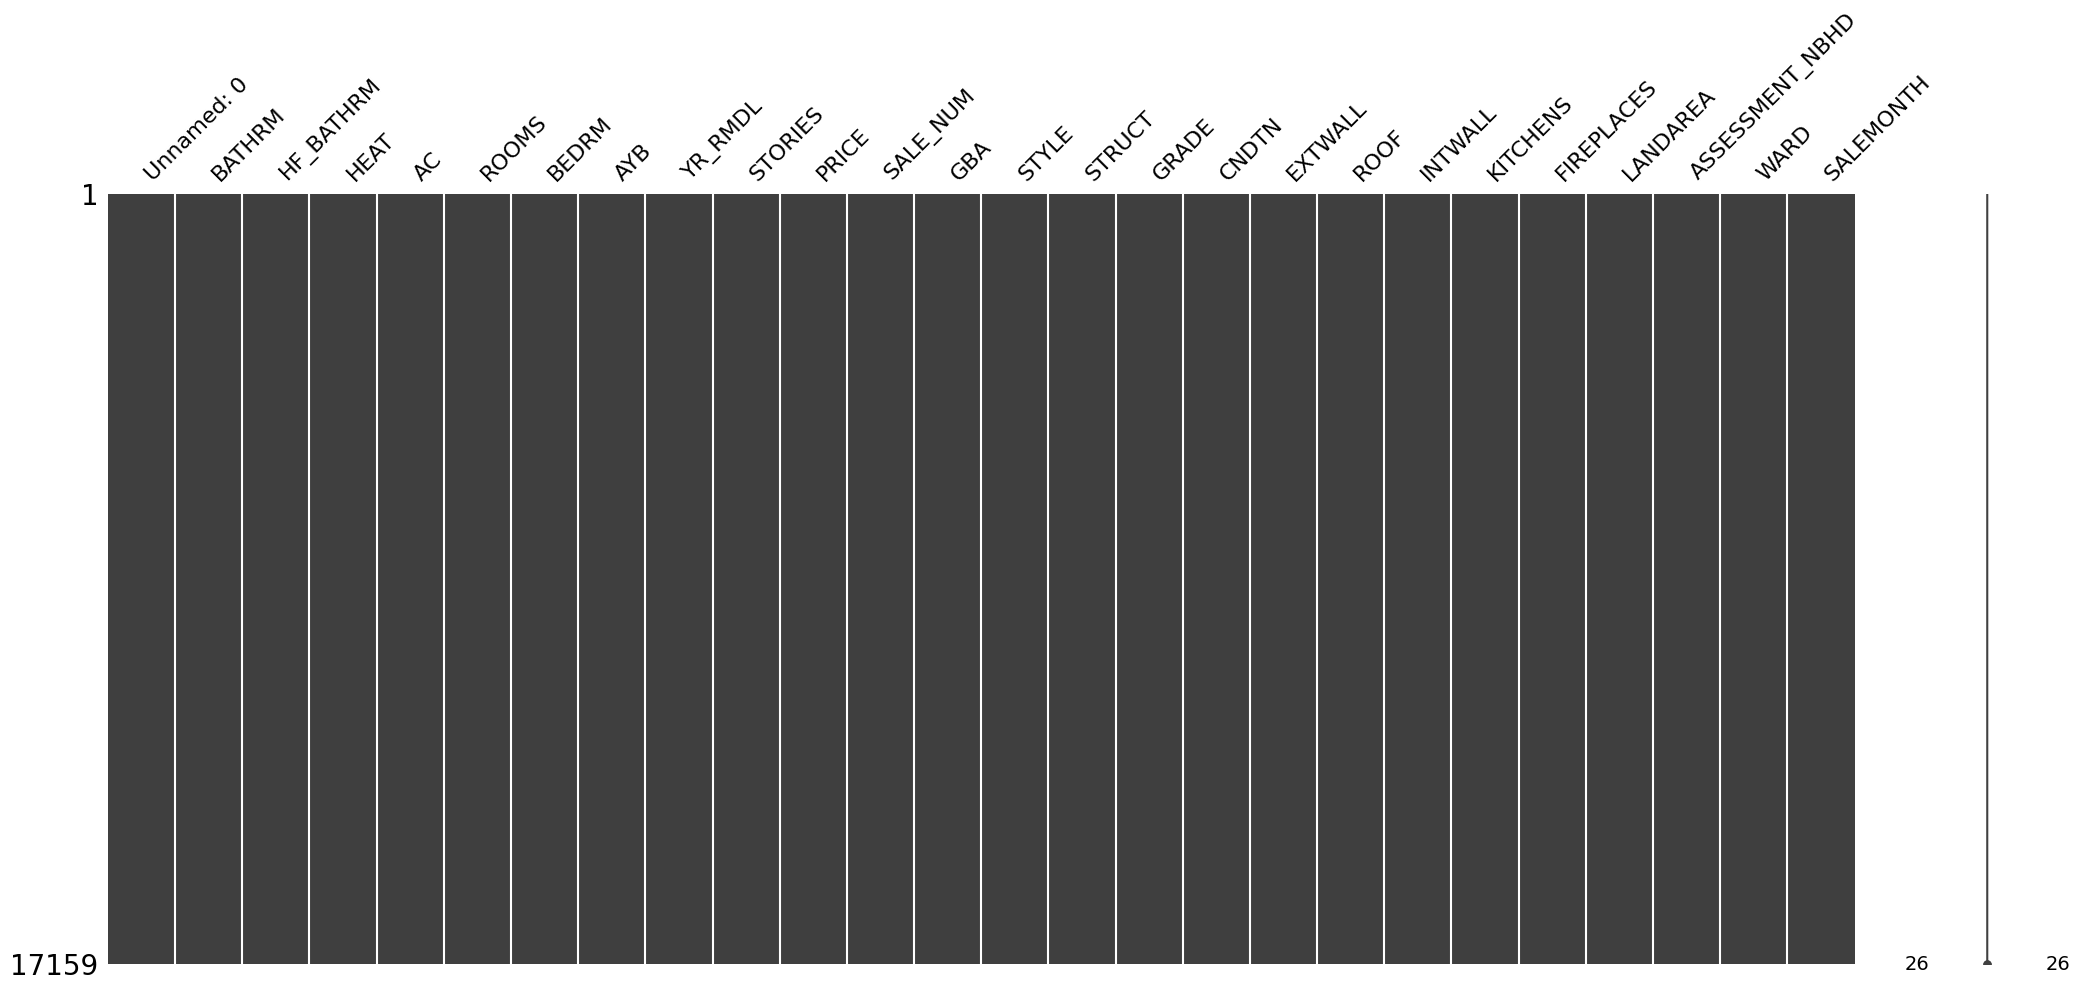

In [155]:
import missingno
missingno.matrix(df_res)

### **Encoding**

Akan dilakukan tahap encoding pada setiap fitur kategorikal di dalam dataset. Jenis encoding yang dilakukan setiap fitur adalah sebagai berikut.
1. Binary Encoding:
    * `BATHROOM`, `HF_BTRM`, `ROOMS`, `BEDRM`, `STORIES`
    * `HEAT`, `KITCHENS`, `FIREPLACES`
    * `STYLE`, `STRUCT`, `GRADE`, `CNDTN`, `EXTWALL`, `ROOF`, `INTWALL`
    * `ASSESSMENT_NBHD`
    
1. One Hot Encoding:
    * `AC` 

In [156]:
#Transform Linear Model
transformer_lr = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['AC']),
    ('binary', ce.BinaryEncoder(), ['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'STORIES',
                                    'HEAT', 'KITCHENS', 'FIREPLACES',
                                    'STYLE', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL',
                                    'ASSESSMENT_NBHD', 'WARD',
                                    'CNDTN', 'GRADE', 'SALEMONTH'])
], remainder='passthrough')

#Transform Non-Linear Model
transformer_nonlr = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['AC']),
    ('binary', ce.BinaryEncoder(), ['BATHRM', 'HF_BATHRM','ROOMS', 'BEDRM', 'STORIES',
                                    'HEAT', 'KITCHENS', 'FIREPLACES',
                                    'STYLE', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL',
                                    'ASSESSMENT_NBHD', 'WARD',
                                    'CNDTN', 'GRADE', 'SALEMONTH'])
], remainder='passthrough')

## **Data Splitting**

Didefinisikan data dan target sebagai berikut.

In [157]:
rnds = 2020

In [158]:
X = df_res.drop(['PRICE'], axis=1)
y = df_res['PRICE']

Data model dibagi dengan proporsi 70:30

In [159]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size= 0.3,
    random_state=rnds)

## **MODELLING**

### **Choose a Benchmark Model**

In [160]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=rnds)
rf = RandomForestRegressor(random_state=rnds)
xgb = XGBRegressor(random_state=rnds)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=rnds)
    
    if i == log_lr:
        estimator = Pipeline([
            ('preprocessing', transformer_lr),
            ('scaler', scaler),
            ('model', i)
        ])
    elif i == log_knn:
        estimator = Pipeline([
            ('preprocessing', transformer_nonlr),
            ('scaler', scaler),
            ('model', i)
        ])
    else:
        estimator = Pipeline([
            ('preprocessing', transformer_nonlr),
            ('model', i)
        ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [161]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-128531.020600,5193.465324,-92663.658037,2967.581251,-0.160908,0.005390
1,KNN Regressor,-125320.173359,2143.432039,-92062.875654,1049.318138,-0.164906,0.003337
2,DecisionTree Regressor,-142808.558063,2893.300840,-102539.781842,2045.170100,-0.178380,0.004959
3,RandomForest Regressor,-98877.497209,2172.780932,-71368.005400,1347.790199,-0.125930,0.001944
4,XGBoost Regressor,-97274.796137,2962.468928,-69809.935792,1182.778777,-0.123365,0.002539


Berdasarkan nilai MAE dan MAPE, nilai RandomForest dan XGBoost merupakan model terbaik sehingga kedua model ini akan digunakan sebagai benchmark.

## **Predict to Test Set with Benchmark Model**

Prediksi akan dilakukan dengan model RandomForest dan XGBoost.

In [162]:
models = {
    'RFG': RandomForestRegressor(random_state=rnds),
    'XGB': XGBRegressor(random_state=rnds)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer_nonlr),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RFG,96177.078732,69672.089588,0.124186
XGB,93722.512119,68085.774055,0.121415


Ketika dilakukan prediksi pada test set, performa XGBRegressor secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai MAE dan MAPE yang sedikit lebih rendah dari RandomForest Regressor

### **Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBRegressor dengan harapan dapat meningkatkan performa model.

In [163]:
# Kedalaman pohon
max_depth = list(np.arange(5, 16))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(5, 16)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(5, 16)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(5, 16)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [164]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=rnds)

# Membuat algorithm chains
estimator_xgb= Pipeline([
        ('preprocessing', transformer_nonlr),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=rnds)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = rnds
)

In [165]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['AC']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['BATHRM',
                                                                                'HF_BATHRM',
                                                                                'ROOMS',
                                                                                'BEDRM',
                                                                                'STORIES',
                                                                                'HEAT',
                                                                                'KITCHENS',
                                                                                'FIREPLACES',
                                                                                'STYLE',
                                                                                'STRUCT',
                                                                                'EXTWALL',
                                                                                'ROOF',
                                                                                'INTWAL...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0, 1.1, 1.2,
                                                             1.3, 1.4, 1.5]},
                   random_state=2020, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [166]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
34,6.734494,0.413422,0.057422,0.007586,0.6,0.464159,114,8,0.05,14,...,1041.868546,1,-0.121992,-0.121195,-0.121027,-0.115532,-0.121432,-0.120236,0.002374,1
48,6.605278,0.108332,0.047801,0.006646,0.6,1.29155,108,9,0.12,13,...,1190.657438,2,-0.125269,-0.120753,-0.122228,-0.118503,-0.123602,-0.122071,0.002327,3
22,4.327821,0.242422,0.070189,0.013178,1.0,3.593814,101,10,0.12,12,...,1090.842799,3,-0.123746,-0.122457,-0.122789,-0.121045,-0.124858,-0.122979,0.001278,4
12,10.552651,0.668378,0.078756,0.018794,0.9,0.464159,200,8,0.02,11,...,986.024382,4,-0.121890,-0.120644,-0.121575,-0.116670,-0.121663,-0.120488,0.001956,2
19,6.923981,0.586777,0.065995,0.011421,0.6,0.007743,168,6,0.22,9,...,1028.285805,6,-0.127171,-0.126050,-0.127898,-0.121324,-0.128783,-0.126245,0.002618,6


In [167]:
# Cek skor dan params terbaik
print('XGBRegressor')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBRegressor
Best_score: -92355.76805038957
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 114, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 14, 'model__colsample_bytree': 1.0}


### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model RandomForestRegressor dan hyperparameter terpilih.

In [168]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=rnds)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,91069.353497,65683.715867,0.116774


### **Performance Comparison**

Perbandingan performa model RandomForestRegressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [169]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,93722.512119,68085.774055,0.121415


In [170]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,91069.353497,65683.715867,0.116774


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

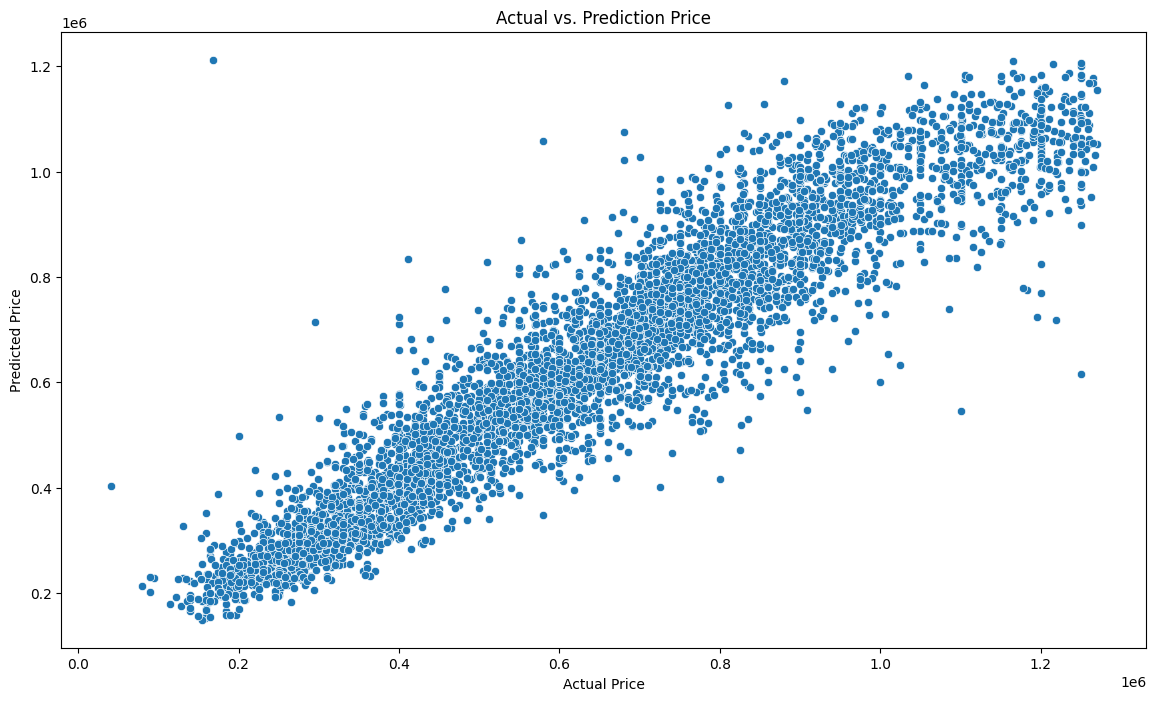

In [171]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Nilai MAPE yang didapat, yaitu sekitar 24% menjadikan model ini belum dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

### **Feature Importances**

<AxesSubplot: title={'center': 'Feature Importances'}>

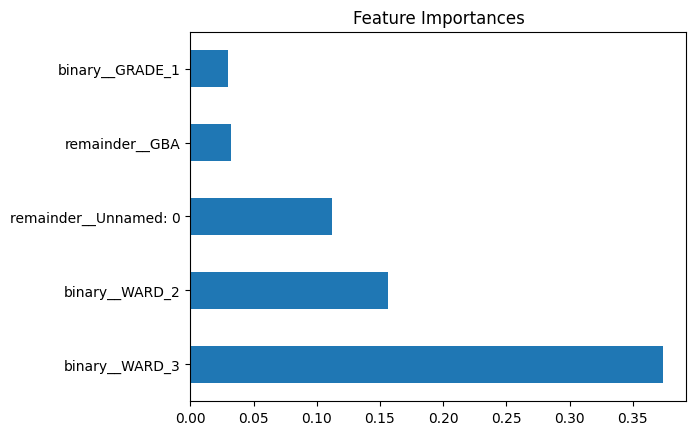

In [172]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer_nonlr.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')